In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [8]:
sales_df = pd.read_csv('WeatherModeling.csv', index_col=False)
sales_df = sales_df.drop(columns=['Unnamed: 0', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'])
sales_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny
0,4/2/24,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1956,847,293,2824,1329,0,0,1,0,0
1,4/5/24,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,485,686,359,2733,773,0,0,0,1,0
2,4/6/24,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,510,354,254,2689,712,0,0,0,1,0
3,4/7/24,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,560,446,388,2844,1009,0,0,0,1,0
4,4/16/24,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1079,135,84,2624,1273,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9/11/24,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,627,977,534,2811,945,0,0,0,0,1
69,9/12/24,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,767,1821,1013,2725,1082,1,0,0,0,0
70,9/13/24,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2111,2484,1437,2830,1577,0,0,0,0,1
71,9/14/24,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2492,2151,1255,2672,1393,1,0,0,0,0


In [11]:
sales_df['EVENT_DATE'] = pd.to_datetime(sales_df['EVENT_DATE'], format='%m/%d/%y', utc=True)
sales_df['EVENT_DATE'] = sales_df['EVENT_DATE'].dt.strftime('%Y-%m-%d')
sales_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1956,847,293,2824,1329,0,0,1,0,0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,485,686,359,2733,773,0,0,0,1,0
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,510,354,254,2689,712,0,0,0,1,0
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,560,446,388,2844,1009,0,0,0,1,0
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1079,135,84,2624,1273,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,627,977,534,2811,945,0,0,0,0,1
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,767,1821,1013,2725,1082,1,0,0,0,0
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2111,2484,1437,2830,1577,0,0,0,0,1
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2492,2151,1255,2672,1393,1,0,0,0,0


In [12]:
rain_dates = ['2024-04-03', '2024-04-04', '2024-04-18', '2024-05-18', '2024-07-31']

sales_df = sales_df[~sales_df['EVENT_DATE'].isin(rain_dates)]
sales_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1956,847,293,2824,1329,0,0,1,0,0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,485,686,359,2733,773,0,0,0,1,0
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,510,354,254,2689,712,0,0,0,1,0
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,560,446,388,2844,1009,0,0,0,1,0
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1079,135,84,2624,1273,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,627,977,534,2811,945,0,0,0,0,1
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,767,1821,1013,2725,1082,1,0,0,0,0
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2111,2484,1437,2830,1577,0,0,0,0,1
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2492,2151,1255,2672,1393,1,0,0,0,0


In [13]:
conditions = [
    sales_df['DAY'].isin(['Fri', 'Sat']),  # Fridays and Saturdays
    sales_df['DAY'] == 'Sun'               # Sundays
]
choices = [3, 2]                     # 3 for Fri/Sat, 2 for Sun

# Use np.select to assign values based on conditions
sales_df['Day_Value'] = np.select(conditions, choices, default=1)  # 1 for all other days
sales_df

/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/2348120332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Day_Value'] = np.select(conditions, choices, default=1)  # 1 for all other days


,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny,Day_Value
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,847,293,2824,1329,0,0,1,0,0,1
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,686,359,2733,773,0,0,0,1,0,3
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,354,254,2689,712,0,0,0,1,0,3
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,446,388,2844,1009,0,0,0,1,0,2
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,135,84,2624,1273,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,977,534,2811,945,0,0,0,0,1,1
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,1821,1013,2725,1082,1,0,0,0,0,1
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2484,1437,2830,1577,0,0,0,0,1,3
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2151,1255,2672,1393,1,0,0,0,0,3


In [14]:
conditions = [
    sales_df['DAY'].isin(['Fri', 'Sat', 'Sun']),  # Fridays and Saturdays
]
choices = [1]                     # 3 for Fri/Sat, 2 for Sun

# Use np.select to assign values based on conditions
sales_df['Weekend'] = np.select(conditions, choices, default=0)  # 1 for all other days
sales_df

/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/1498602844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Weekend'] = np.select(conditions, choices, default=0)  # 1 for all other days


,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny,Day_Value,Weekend
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,293,2824,1329,0,0,1,0,0,1,0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,359,2733,773,0,0,0,1,0,3,1
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,254,2689,712,0,0,0,1,0,3,1
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,388,2844,1009,0,0,0,1,0,2,1
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,84,2624,1273,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,534,2811,945,0,0,0,0,1,1,0
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,1013,2725,1082,1,0,0,0,0,1,0
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,1437,2830,1577,0,0,0,0,1,3,1
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,1255,2672,1393,1,0,0,0,0,3,1


In [16]:
def promotion_category(promotion):
    if 'firework' in promotion.lower():
        return 'Fireworks'
    elif 'town' in promotion.lower():
        return 'Town Takeover'
    elif 'autograph' in promotion.lower():
        return 'PlayerExp'
    elif 'bases' in promotion.lower():
        return 'PlayerExp'
    elif 'batting' in promotion.lower():
        return 'PlayerExp'
    elif 'heritage' in promotion.lower():
        return 'Heritage'
    elif len(promotion) == 0:
        return 'None'
    else:
        return 'Promotion'
    

sales_df['Promotion_Group'] = sales_df['Promotions/Events'].apply(promotion_category)
sales_df

/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/4281865894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Promotion_Group'] = sales_df['Promotions/Events'].apply(promotion_category)


,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny,Day_Value,Weekend,Promotion_Group
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,2824,1329,0,0,1,0,0,1,0,Promotion
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,2733,773,0,0,0,1,0,3,1,Promotion
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,2689,712,0,0,0,1,0,3,1,Fireworks
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,2844,1009,0,0,0,1,0,2,1,Promotion
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,2624,1273,1,0,0,0,0,1,0,PlayerExp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,2811,945,0,0,0,0,1,1,0,Promotion
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,2725,1082,1,0,0,0,0,1,0,PlayerExp
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2830,1577,0,0,0,0,1,3,1,PlayerExp
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2672,1393,1,0,0,0,0,3,1,Fireworks


In [96]:
X = sales_df[['Sales_Count','Weekend']]
y = sales_df['Attendance_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

params = np.append(model.intercept_,model.coef_)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 131618.3081233752
R-squared: 0.9413610882712463
Coefficients: [  0.83883752 206.60892709]
Intercept: -1424.4900398164255


In [101]:
#newXT = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0    -1424.4900          177.045    -8.046          0.000
1        0.8388            0.034    24.712          0.000
2      206.6089          107.658     1.919          0.059


In [38]:
sales_df['Firework'] = np.where(sales_df['Promotions/Events'].str.contains('fireworks', case=False, na=False), 1, 0)
sales_df['TownTakeover'] = np.where(sales_df['Promotions/Events'].str.contains('town', case=False, na=False), 1, 0)
sales_df['Autograph'] = np.where(sales_df['Promotions/Events'].str.contains('autograph', case=False, na=False), 1, 0)
sales_df['RunBases'] = np.where(sales_df['Promotions/Events'].str.contains('bases', case=False, na=False), 1, 0)
sales_df['Batting'] = np.where(sales_df['Promotions/Events'].str.contains('batting', case=False, na=False), 1, 0)
sales_df['Heritage'] = np.where(sales_df['Promotions/Events'].str.contains('heritage', case=False, na=False), 1, 0)
sales_df['PlayerExp'] = sales_df['Autograph'] | sales_df['RunBases'] | sales_df['Batting']

sales_df



/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/249915482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Firework'] = np.where(sales_df['Promotions/Events'].str.contains('fireworks', case=False, na=False), 1, 0)
/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/249915482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['TownTakeover'] = np.where(sales_df['Promotions/Events'].str.contains('town', case=False, na=False), 1, 0)
/var/folders/23/z3k66lxx0

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Day_Value,Weekend,Promotion_Group,Firework,TownTakeover,Autograph,RunBases,Batting,Heritage,PlayerExp
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1,0,Promotion,0,0,0,0,0,0,0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,3,1,Promotion,0,0,0,0,0,0,0
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,3,1,Fireworks,1,1,0,0,0,0,0
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,2,1,Promotion,0,0,0,0,0,0,0
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1,0,PlayerExp,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,1,0,Promotion,0,0,0,0,0,0,0
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,1,0,PlayerExp,0,0,1,0,1,0,1
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,3,1,PlayerExp,0,0,0,0,1,0,1
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,3,1,Fireworks,0,0,1,0,1,0,1


In [104]:
X = sales_df[['Sales_Count','Firework','PlayerExp','TownTakeover','Batting', 'Heritage']]
y = sales_df['Attendance_Count']
X2 = sm.add_constant(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

params = np.append(model.intercept_,model.coef_)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
myDF3.index = X2.columns.values
print(myDF3)


Mean Squared Error: 146479.3353351039
R-squared: 0.9347401669473655
Coefficients: [   0.91252693  243.81359847   82.57869466 -142.12736013 -548.17783805
 -343.40684569]
Intercept: -1681.0948050235174
              Coefficients  Standard Errors  t values  Probabilities
const           -1681.0948          193.957    -8.667          0.000
Sales_Count         0.9125            0.034    27.186          0.000
Firework          243.8136          147.250     1.656          0.103
PlayerExp          82.5787          118.352     0.698          0.488
TownTakeover     -142.1274          106.618    -1.333          0.187
Batting          -548.1778          254.208    -2.156          0.035
Heritage         -343.4068          146.885    -2.338          0.023


In [45]:
column_sums = sales_df[['Firework','TownTakeover','Batting','Heritage', 'Autograph', 'RunBases']].sum()
print(column_sums)

Firework         9
TownTakeover    21
Batting          3
Heritage        11
Autograph        6
RunBases        11
dtype: int64


In [40]:
sales_df.to_csv('promotion.csv')

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import datetime


In [47]:
filtered_df = sales_df[sales_df['EVENT_DATE'] != '2024-07-04']
filtered_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Day_Value,Weekend,Promotion_Group,Firework,TownTakeover,Autograph,RunBases,Batting,Heritage,PlayerExp
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1,0,Promotion,0,0,0,0,0,0,0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,3,1,Promotion,0,0,0,0,0,0,0
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,3,1,Fireworks,1,1,0,0,0,0,0
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,2,1,Promotion,0,0,0,0,0,0,0
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1,0,PlayerExp,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,1,0,Promotion,0,0,0,0,0,0,0
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,1,0,PlayerExp,0,0,1,0,1,0,1
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,3,1,PlayerExp,0,0,0,0,1,0,1
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,3,1,Fireworks,0,0,1,0,1,0,1


Mean Squared Error: 341941.19468473666
R-squared: 0.8476575195545929


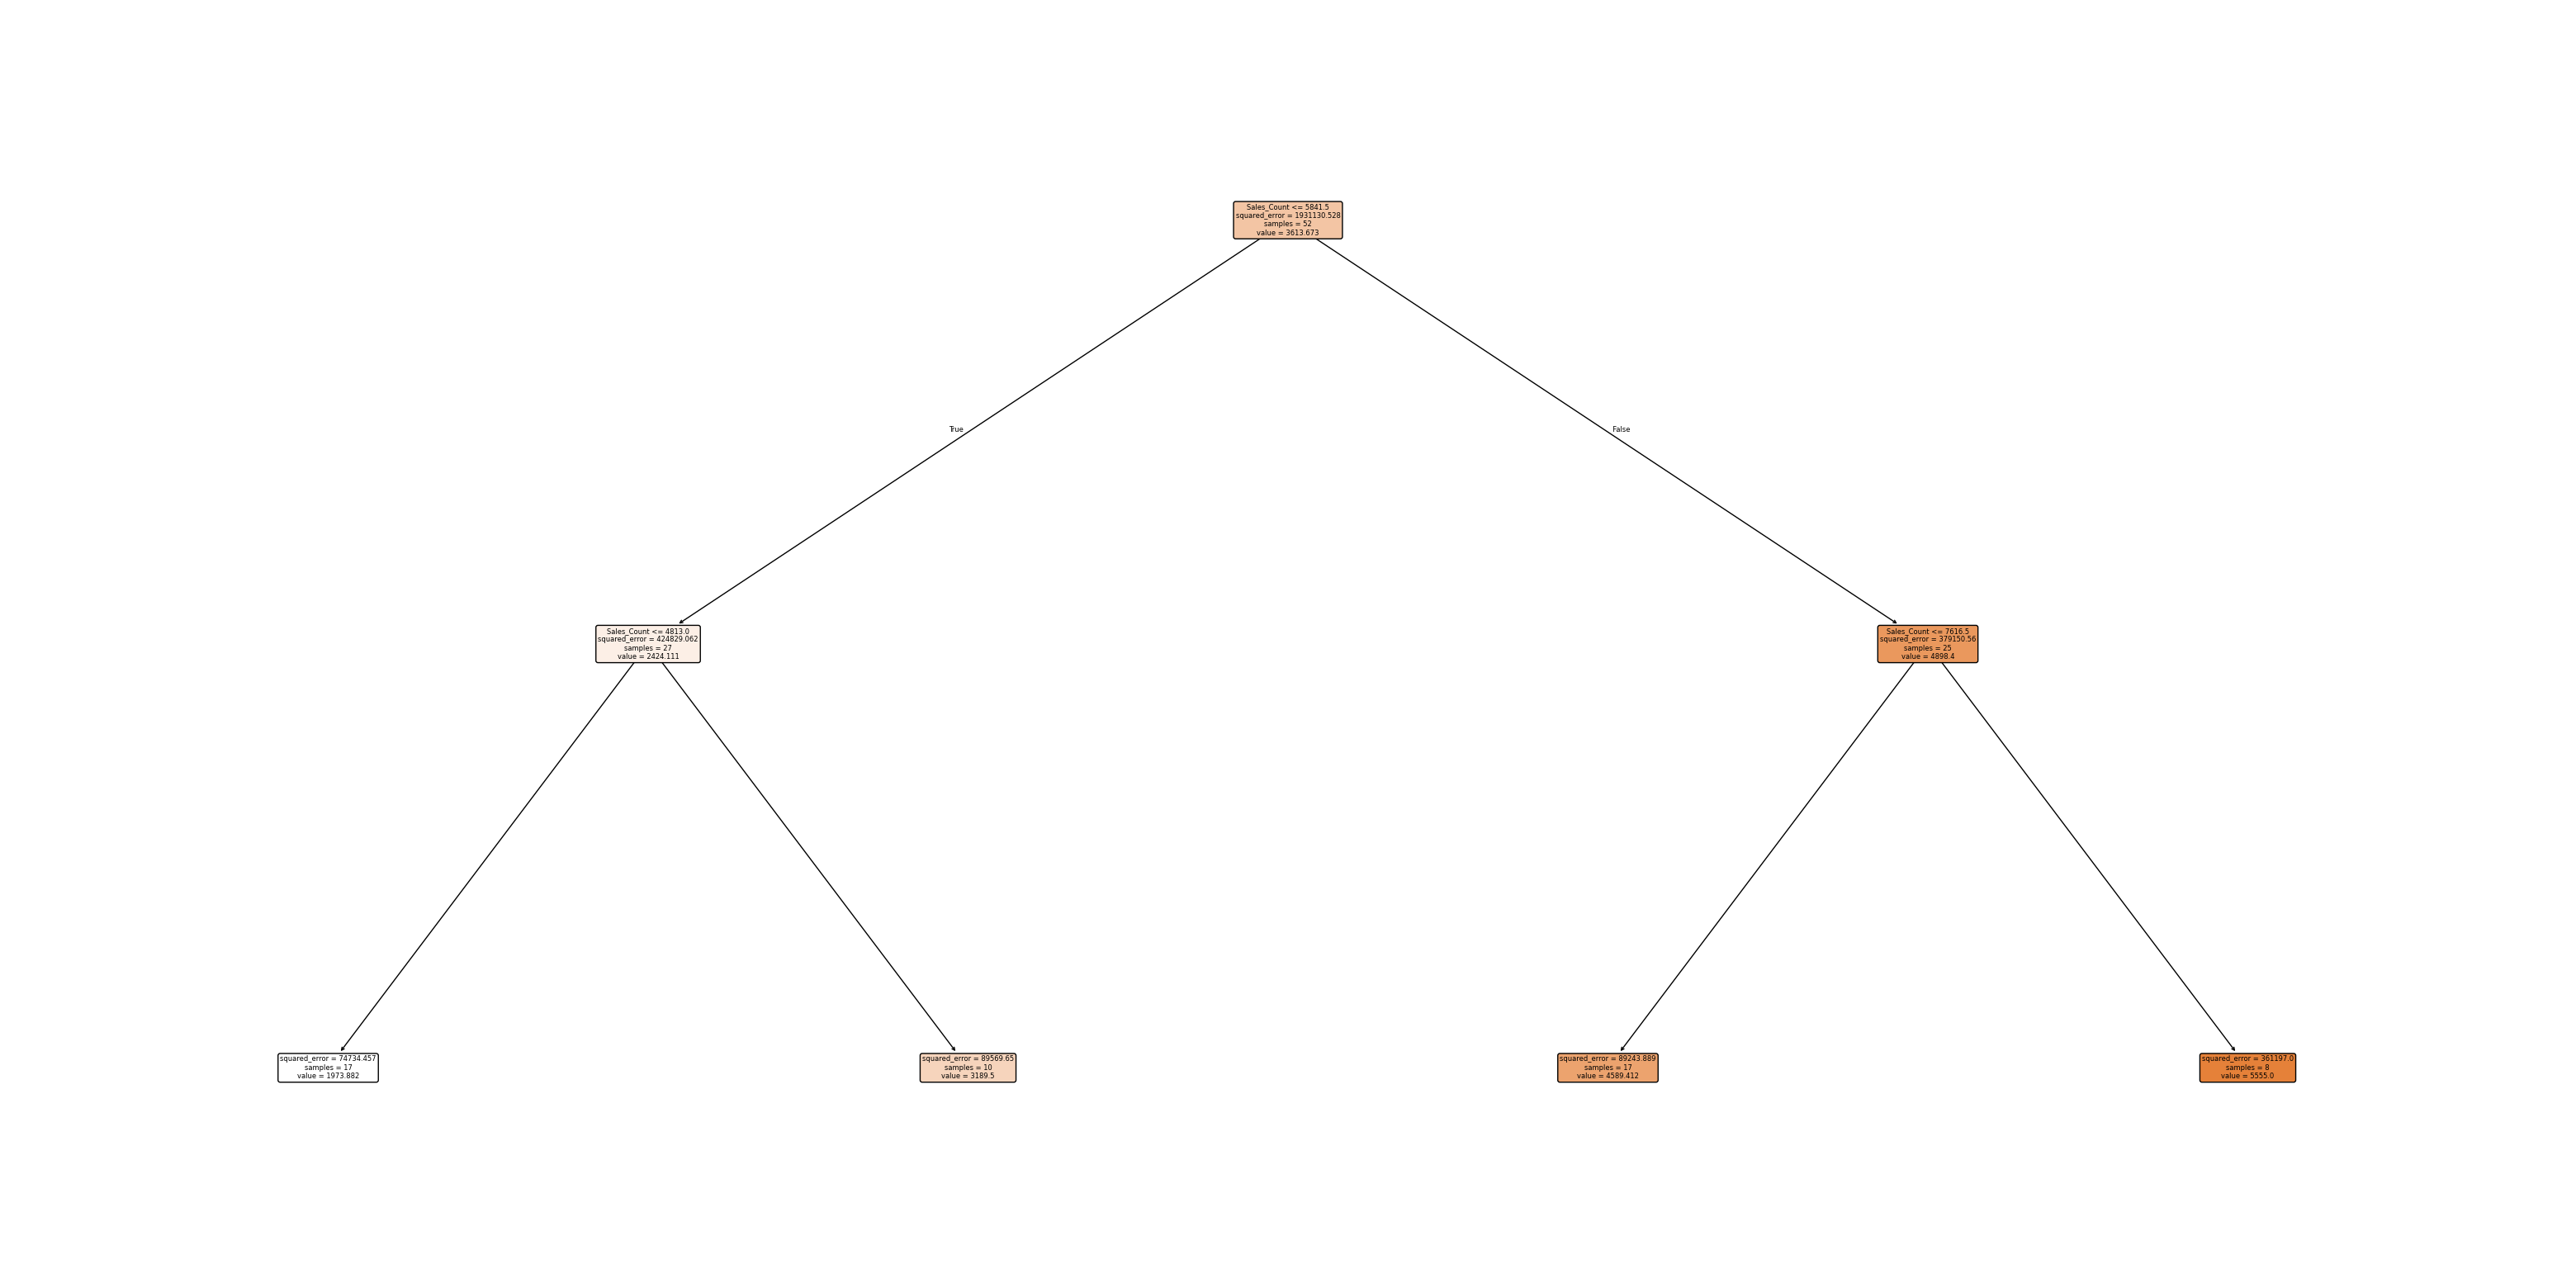

In [58]:
X = sales_df[['Sales_Count','Weekend', 'Firework','PlayerExp']]
y = sales_df['Attendance_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = tree.DecisionTreeRegressor(max_depth=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

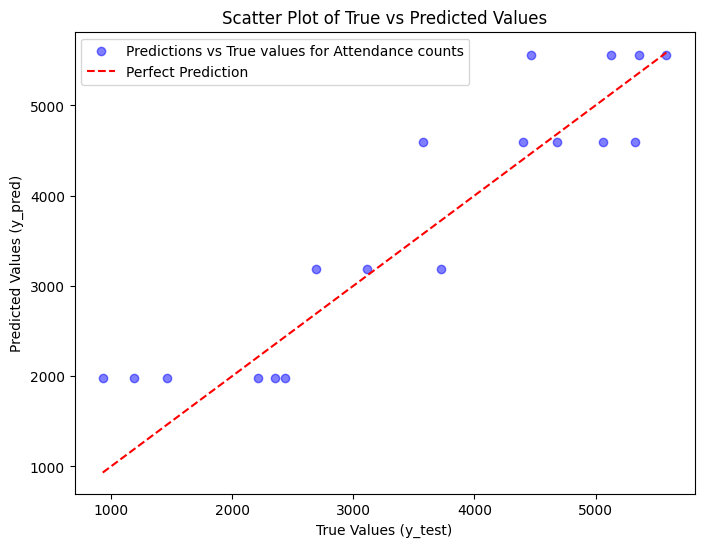

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions vs True values for Attendance counts')

# Adding a line representing the perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs Predicted Values')
plt.legend()
plt.show()


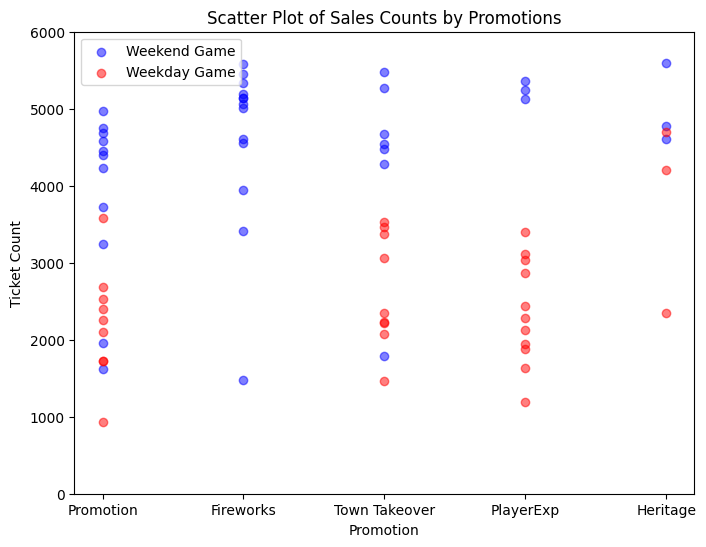

In [107]:
weekend_df = filtered_df[filtered_df['Weekend'] == 1]
weekday_df = filtered_df[filtered_df['Weekend'] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(weekend_df['Promotion_Group'], weekend_df['Attendance_Count'], color='blue', alpha=0.5, label='Weekend Game')
plt.scatter(weekday_df['Promotion_Group'], weekday_df['Attendance_Count'], color='red', alpha=0.5, label='Weekday Game')
#plt.scatter(filtered_df['Promotion_Group'], filtered_df['Sales_Count'], color='green', alpha=0.5, label='Sales Counts')


# Labels and title
plt.xlabel('Promotion')
plt.ylabel('Ticket Count')
plt.ylim(0, 6000)
plt.title('Scatter Plot of Sales Counts by Promotions')
plt.legend()
plt.show()

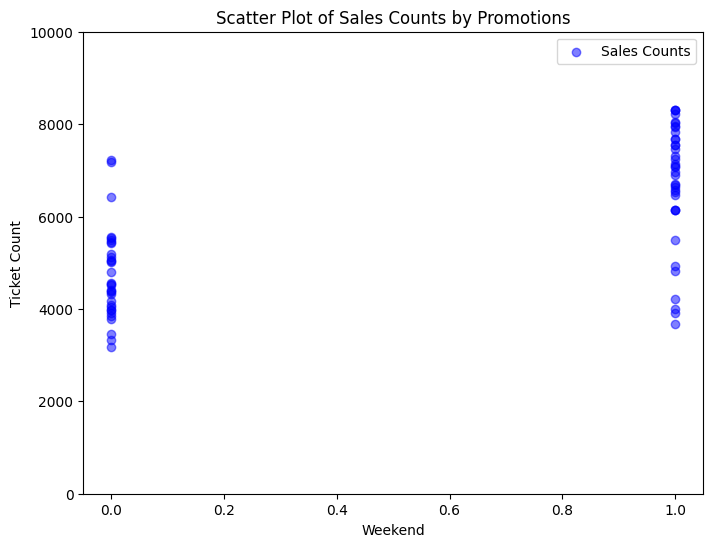

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Weekend'], filtered_df['Sales_Count'], color='blue', alpha=0.5, label='Sales Counts')
#plt.scatter(filtered_df['Promotion_Group'], filtered_df['Sales_Count'], color='green', alpha=0.5, label='Sales Counts')


# Labels and title
plt.xlabel('Weekend')
plt.ylabel('Ticket Count')
plt.ylim(0, 10000)
plt.title('Scatter Plot of Sales Counts by Promotions')
plt.legend()
plt.show()

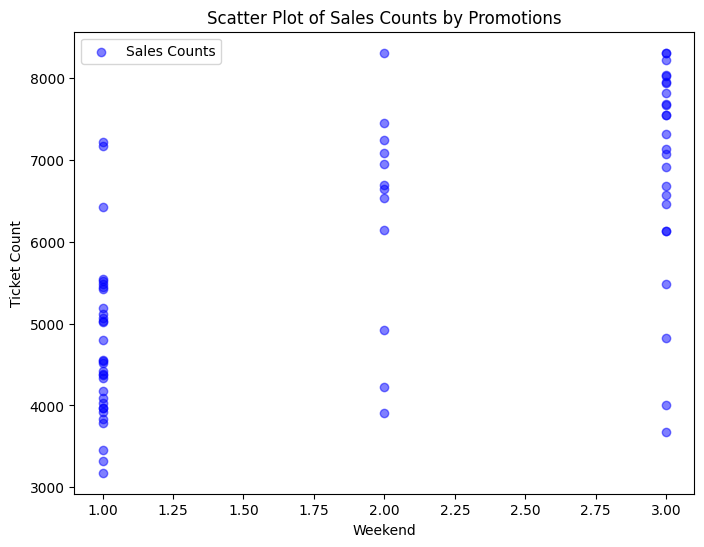

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Day_Value'], filtered_df['Sales_Count'], color='blue', alpha=0.5, label='Sales Counts')
#plt.scatter(filtered_df['Promotion_Group'], filtered_df['Sales_Count'], color='green', alpha=0.5, label='Sales Counts')


# Labels and title
plt.xlabel('Weekend')
plt.ylabel('Ticket Count')
plt.title('Scatter Plot of Sales Counts by Promotions')
plt.legend()
plt.show()

In [ ]:
conditions = [
    sales_df['Promotion_Groups'].isin(['Fri', 'Sat', 'Sun']),  # Fridays and Saturdays
]
choices = [1]                     # 3 for Fri/Sat, 2 for Sun

# Use np.select to assign values based on conditions
sales_df['Weekend'] = np.select(conditions, choices, default=0)  # 1 for all other days
sales_df

In [90]:
sales_df['Sales_Group'] = pd.qcut(sales_df['Sales_Count'], q = 4, labels=['Worst', 'Bad', 'Good', 'Best'])
print(sales_df['Sales_Group'].value_counts())

Sales_Group
Worst    18
Best     18
Bad      17
Good     17
Name: count, dtype: int64


/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/3045820468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Sales_Group'] = pd.qcut(sales_df['Sales_Count'], q = 4, labels=['Worst', 'Bad', 'Good', 'Best'])


In [91]:
sales_df['Attendance_Group'] = pd.qcut(sales_df['Attendance_Count'], q = 4, labels=['Worst', 'Bad', 'Good', 'Best'])
print(sales_df['Attendance_Group'].value_counts())

Attendance_Group
Worst    18
Best     18
Bad      17
Good     17
Name: count, dtype: int64


/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/2077958688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Attendance_Group'] = pd.qcut(sales_df['Attendance_Count'], q = 4, labels=['Worst', 'Bad', 'Good', 'Best'])


In [78]:
filtered_df = sales_df[sales_df['EVENT_DATE'] != '2024-07-04']
filtered_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Promotion_Group,Firework,TownTakeover,Autograph,RunBases,Batting,Heritage,PlayerExp,Sales_Group,Attendance_Group
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,Promotion,0,0,0,0,0,0,0,Average,Average
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,Promotion,0,0,0,0,0,0,0,Bad,Bad
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,Fireworks,1,1,0,0,0,0,0,Bad,Worst
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,Promotion,0,0,0,0,0,0,0,Bad,Bad
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,PlayerExp,0,0,0,1,0,0,1,Bad,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,Promotion,0,0,0,0,0,0,0,Bad,Bad
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,PlayerExp,0,0,1,0,1,0,1,Average,Bad
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,PlayerExp,0,0,0,0,1,0,1,Best,Good
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,Fireworks,0,0,1,0,1,0,1,Good,Good


Accuracy: 0.67
Precision: 0.67
Recall: 0.67


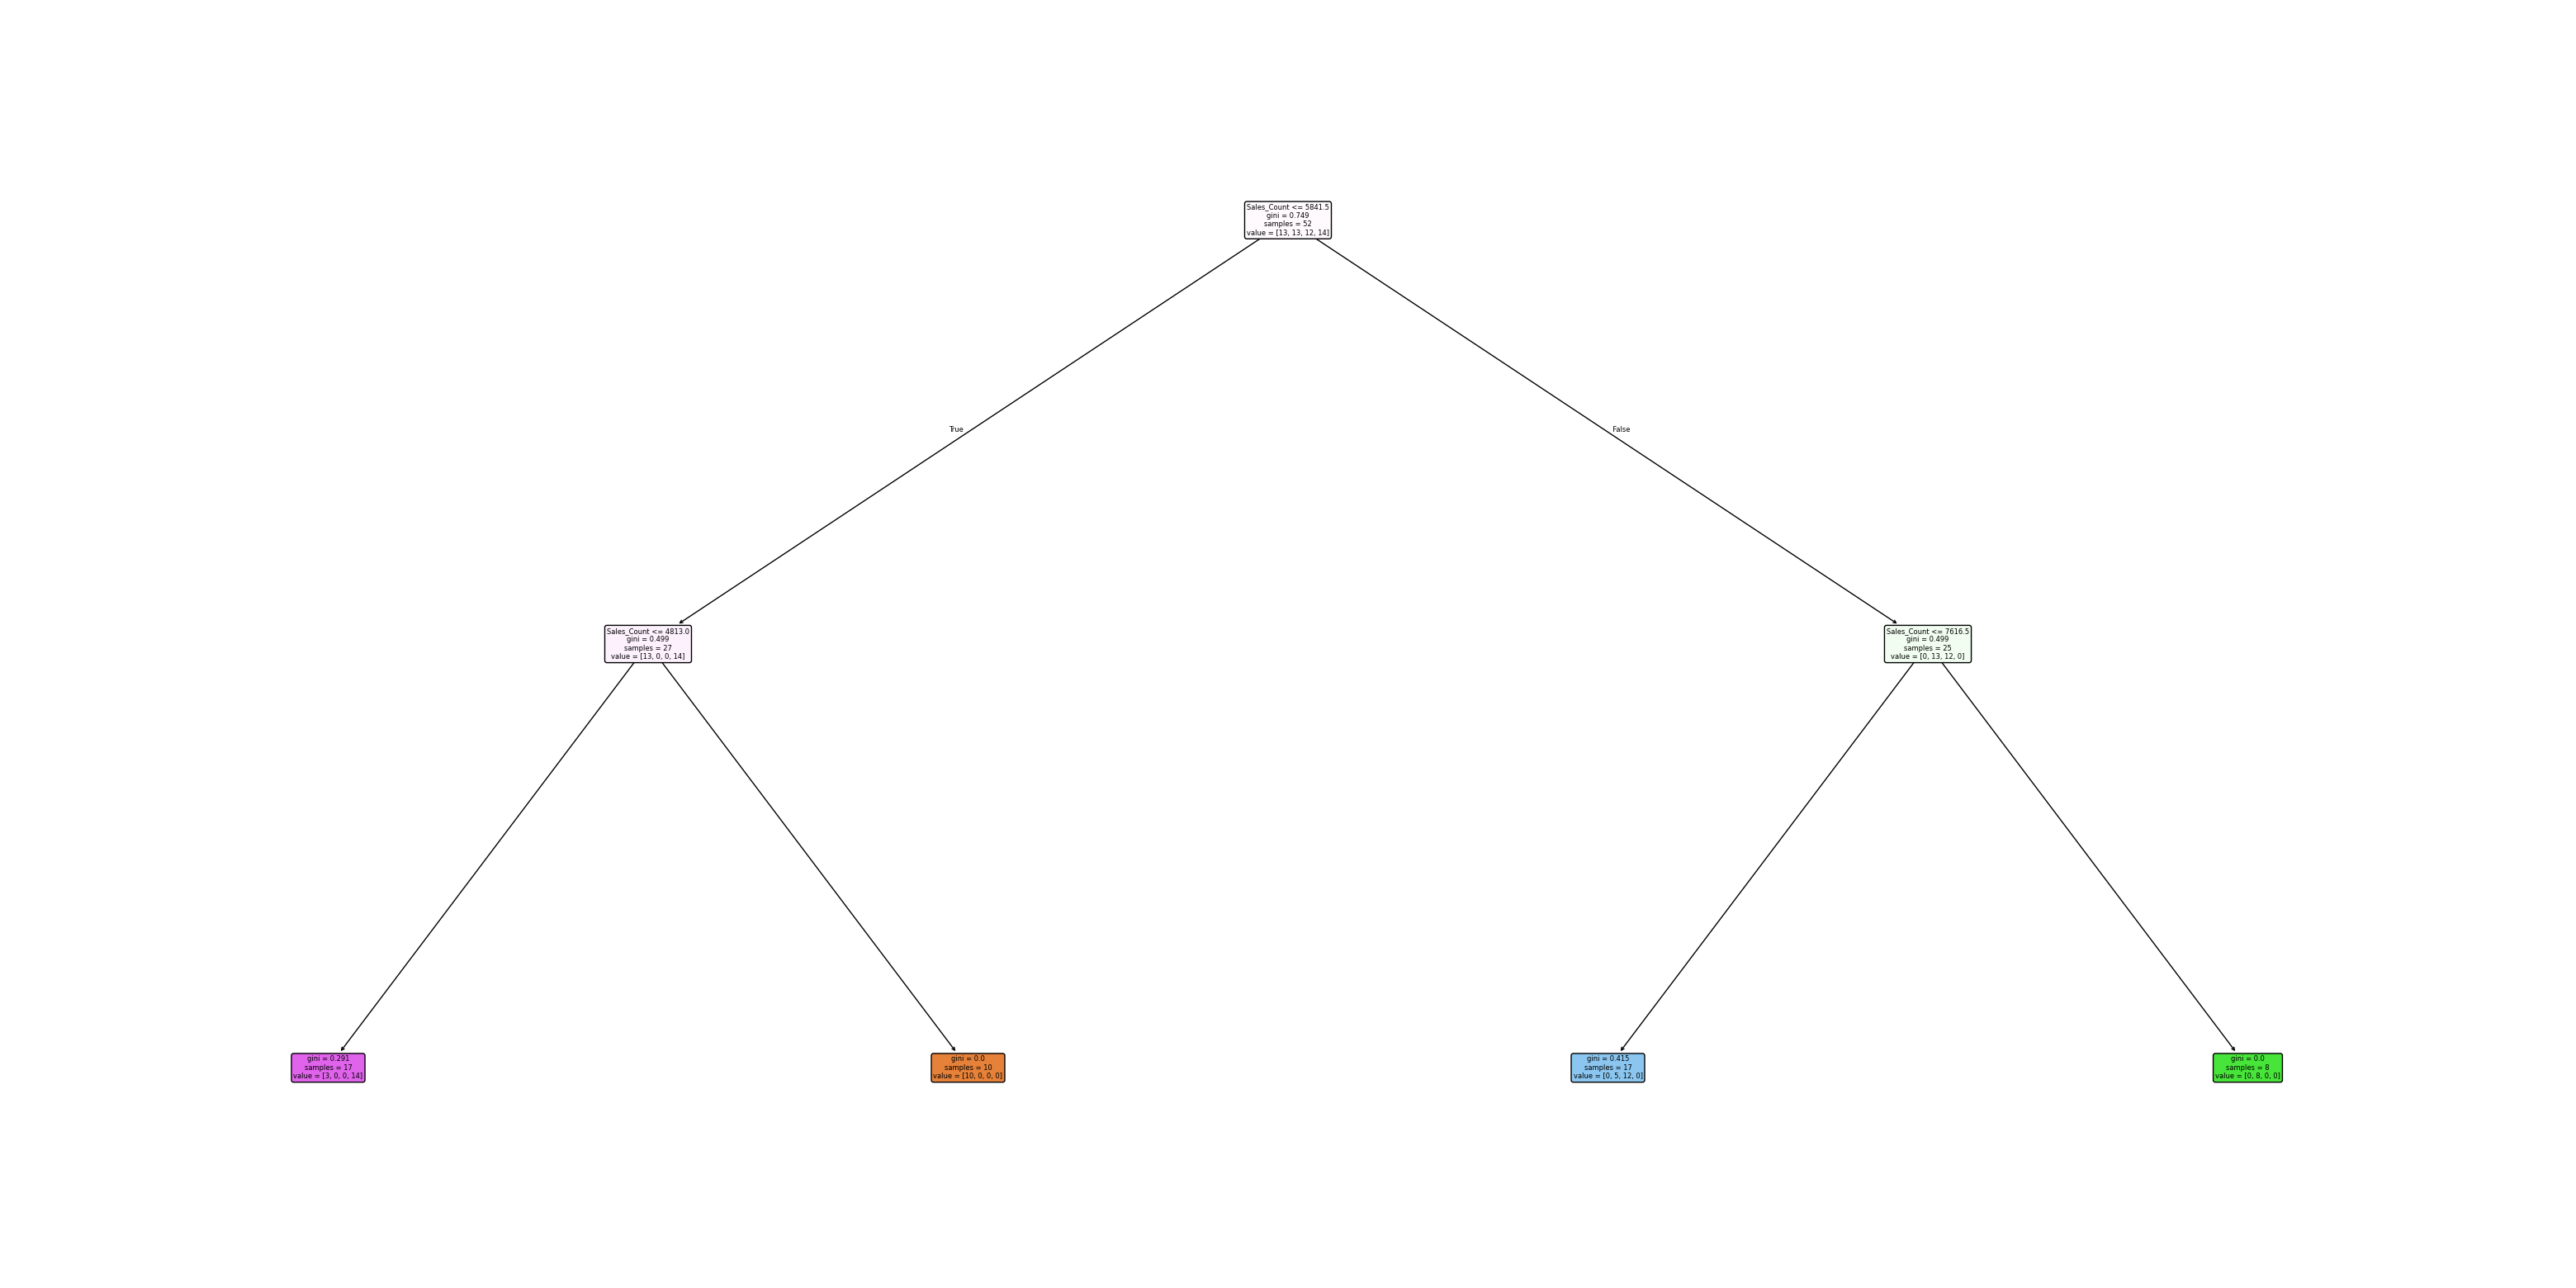

In [121]:
X = sales_df[['Sales_Count','Weekend', 'Firework','PlayerExp', 'TownTakeover', 'Heritage']]
y = sales_df['Attendance_Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' to handle imbalanced classes
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

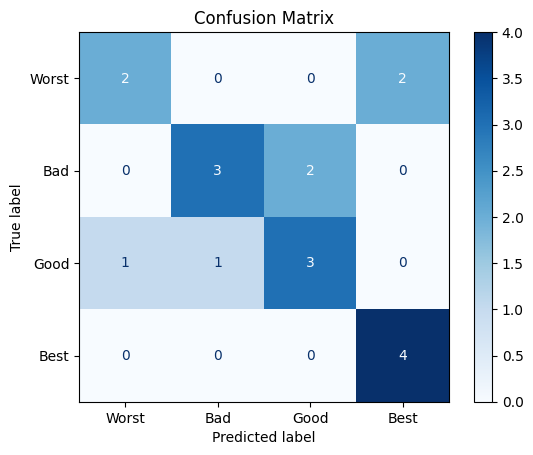

In [122]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Optionally, get class labels (replace with your class names)
class_labels = ['Worst', 'Bad', 'Good', 'Best']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

/Users/akshayshinde/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.28
Precision: 0.32
Recall: 0.28


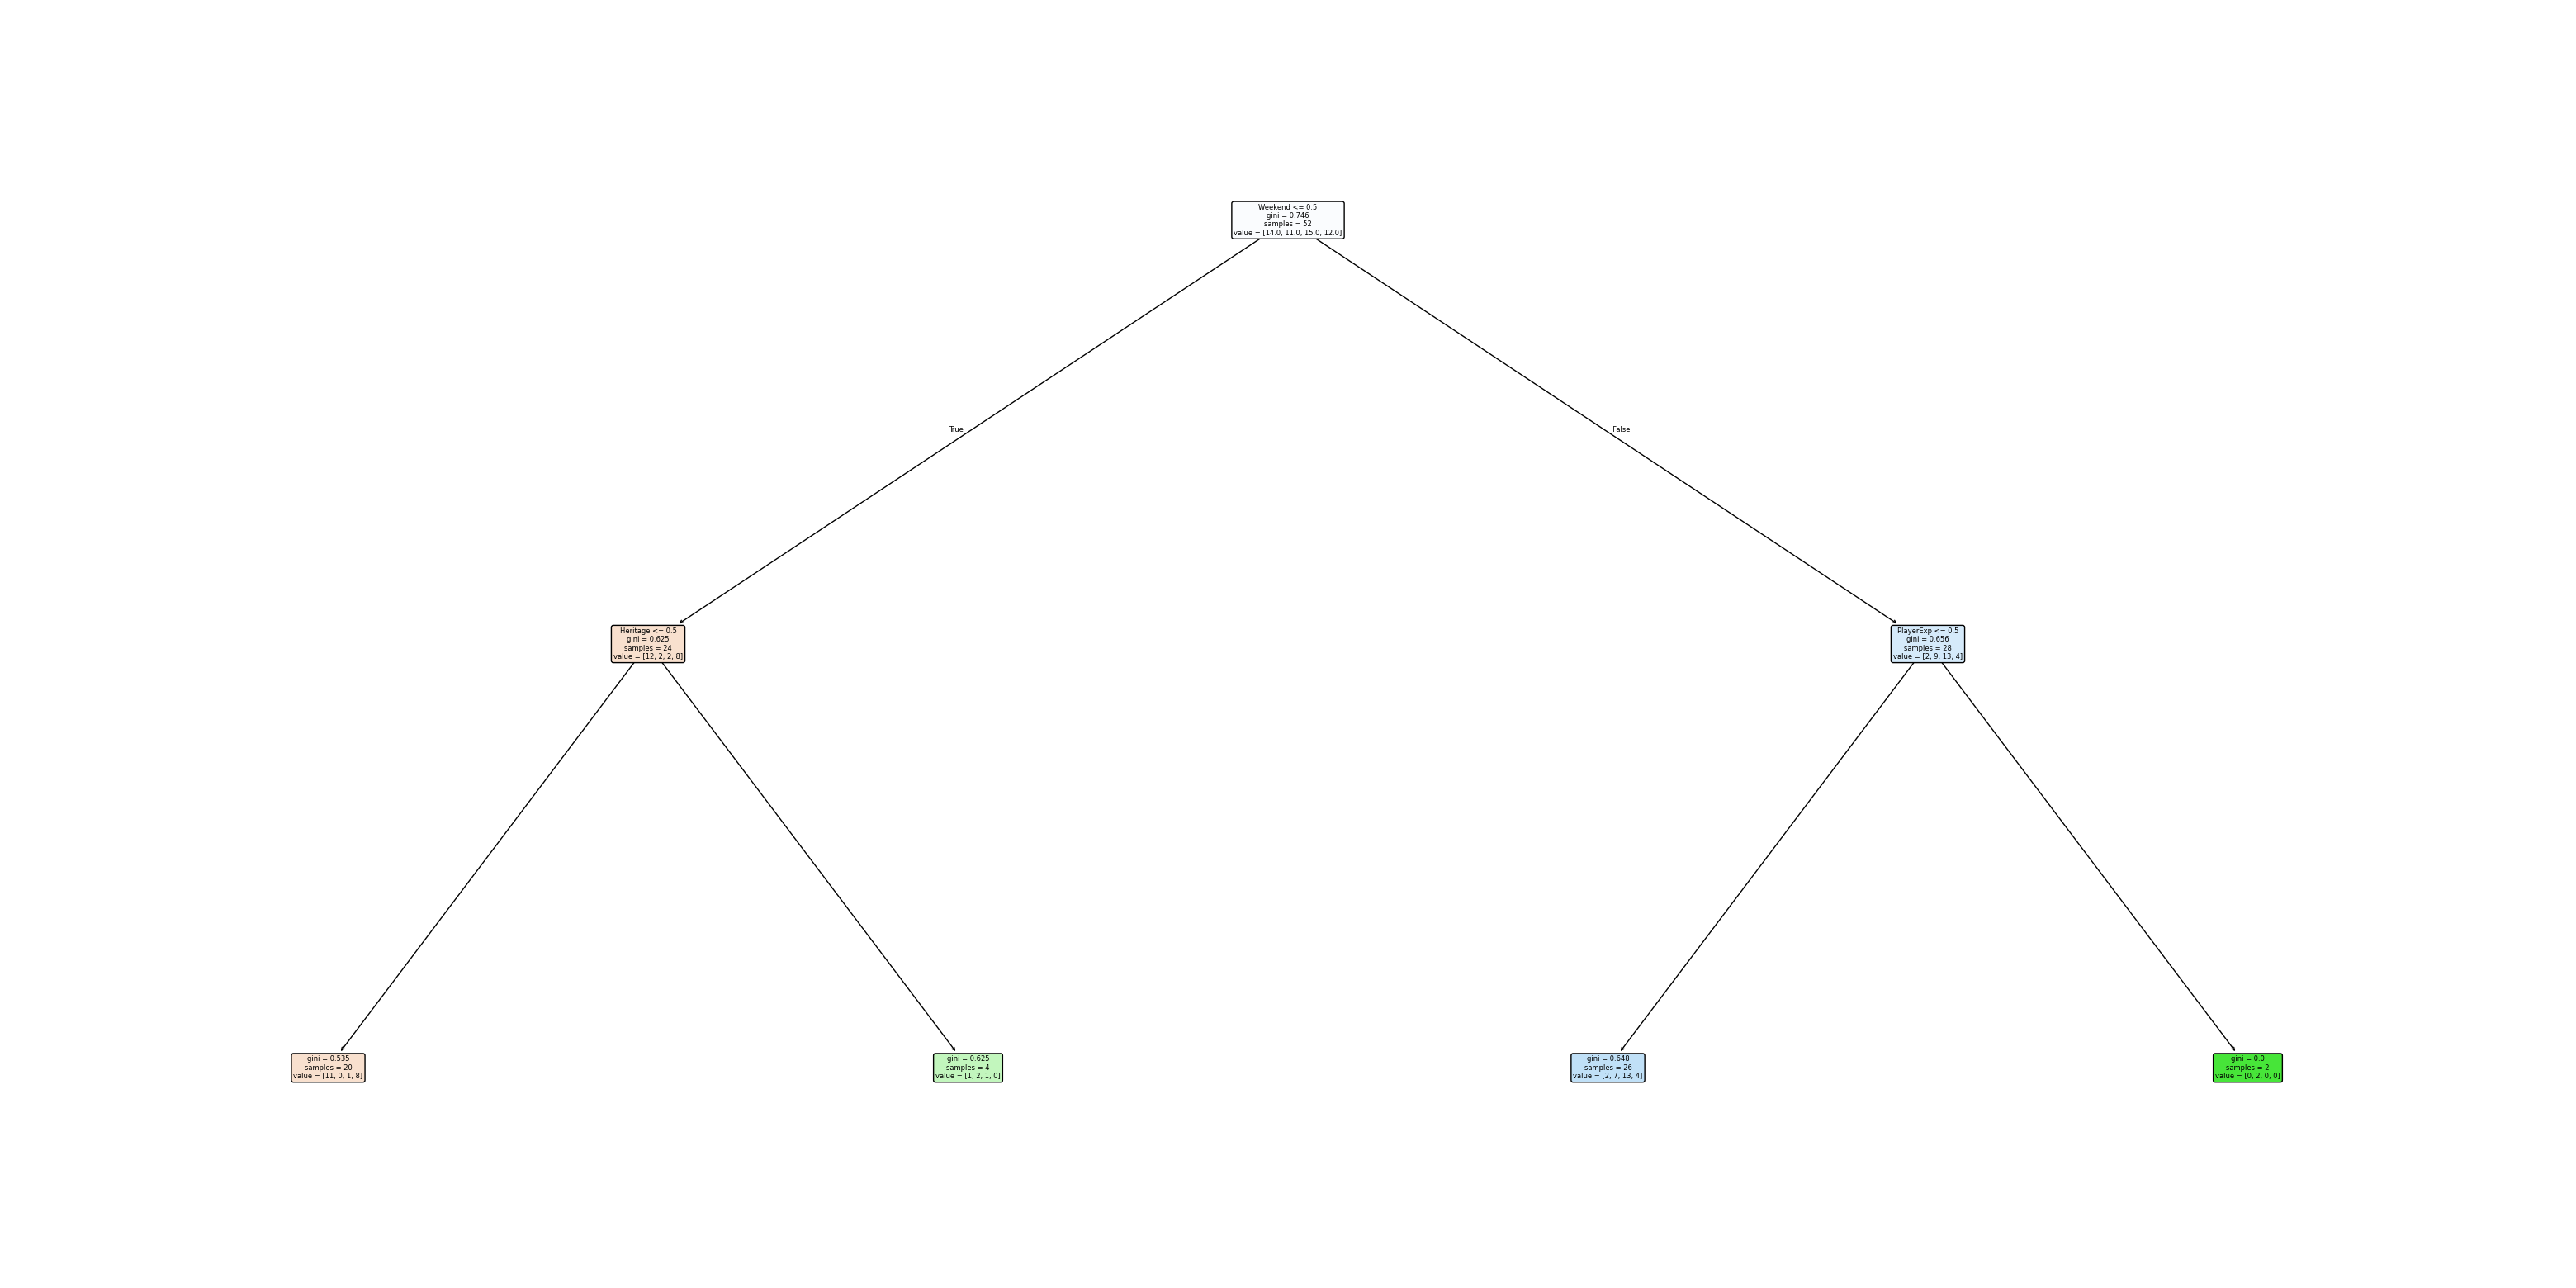

In [94]:
X = sales_df[['Weekend', 'Firework','PlayerExp', 'TownTakeover', 'Heritage']]
y = sales_df['Sales_Group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' to handle imbalanced classes
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

In [111]:
X = sales_df[['max_temp','Weekend']]
y = sales_df['AttendancePercentage']
X2 = sm.add_constant(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

params = np.append(model.intercept_,model.coef_)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
myDF3.index = X2.columns.values
print(myDF3)


Mean Squared Error: 0.009749924340079147
R-squared: 0.3311223244292274
Coefficients: [0.00373536 0.12813038]
Intercept: 0.24991934272899952
          Coefficients  Standard Errors  t values  Probabilities
const           0.2499            0.069     3.616          0.001
max_temp        0.0037            0.001     4.202          0.000
Weekend         0.1281            0.024     5.368          0.000


In [113]:
sales_df['AttendancePercentage_Packages'] = sales_df['Attendance_Packages_Count'] / sales_df['Sales_Packages_Count']
sales_df['AttendancePercentage_Packages'] = sales_df['AttendancePercentage_Packages'].round(2)
sales_df

/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/489150728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['AttendancePercentage_Packages'] = sales_df['Attendance_Packages_Count'] / sales_df['Sales_Packages_Count']
/var/folders/23/z3k66lxx0cd1jl6zg3b31qhr0000gn/T/ipykernel_36615/489150728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['AttendancePercentage_Packages'] = sales_df['AttendancePercentage_Packages'].round(2)


,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Firework,TownTakeover,Autograph,RunBases,Batting,Heritage,PlayerExp,Sales_Group,Attendance_Group,AttendancePercentage_Packages
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,0,0,0,0,0,0,0,Good,Good,0.47
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,0,0,0,0,0,0,0,Worst,Worst,0.28
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,1,1,0,0,0,0,0,Worst,Worst,0.26
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,0,0,0,0,0,0,0,Worst,Worst,0.35
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,0,0,0,1,0,0,1,Worst,Bad,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,0,0,0,0,0,0,0,Bad,Worst,0.34
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,0,0,1,0,1,0,1,Bad,Bad,0.40
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,0,0,0,0,1,0,1,Best,Best,0.56
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,0,0,1,0,1,0,1,Best,Best,0.52


In [117]:
X = sales_df[['Condition_Rain','Weekend']]
y = sales_df['AttendancePercentage_Packages']
X2 = sm.add_constant(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

params = np.append(model.intercept_,model.coef_)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
myDF3.index = X2.columns.values
print(myDF3)


Mean Squared Error: 0.008294843792866942
R-squared: 0.3559564358386519
Coefficients: [-0.03711111  0.10961111]
Intercept: 0.37772222222222224
                Coefficients  Standard Errors  t values  Probabilities
const                 0.3777            0.019    19.447          0.000
Condition_Rain       -0.0371            0.022    -1.704          0.093
Weekend               0.1096            0.022     5.026          0.000


In [119]:
X = sales_df[['Sales_Packages_Count','Condition_Rain','Weekend']]
y = sales_df['Attendance_Packages_Count']
X2 = sm.add_constant(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

params = np.append(model.intercept_,model.coef_)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = mse*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
myDF3.index = X2.columns.values
print(myDF3)


Mean Squared Error: 57181.3903111658
R-squared: 0.39320180229132884
Coefficients: [  0.55142483 -93.15946425 294.07105403]
Intercept: -463.3417141034729
                      Coefficients  Standard Errors  t values  Probabilities
const                    -463.3417          500.479    -0.926          0.358
Sales_Packages_Count        0.5514            0.186     2.972          0.004
Condition_Rain            -93.1595           57.370    -1.624          0.109
Weekend                   294.0711           58.254     5.048          0.000


In [124]:
test_df = sales_df.groupby('Day_Value')['Sales_Count'].mean()
test_df

Day_Value
1    4872.787879
2    6342.583333
3    6940.240000
Name: Sales_Count, dtype: float64